In [46]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from skimage.transform import rescale
from matplotlib import pyplot as plt

In [3]:
class generator(nn.Module):
    def __init__(self):
        super(generator, self).__init__()
               
    def forward(self, x):
        x = self.generator(x)
        x = F.interpolate(x, scale_factor=2)
        x = F.relu(x)
        x = self.generator_2(x)
        return x

In [4]:
model = torch.load('../data/models/1_1_x2_31.51714700146426.pt')
model.eval()

generator(
  (generator): Sequential(
    (0): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU()
    (5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU()
    (8): Conv2d(64, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (generator_2): Sequential(
    (0): Conv2d(256, 3, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (1): Sigmoid()
  )
)

In [13]:
data = pd.read_csv('../data/DatasetA.csv')

In [16]:
arr = np.array(data.drop(columns = ['emotion']))

In [19]:
arr.shape

(28709, 2304)

In [77]:
device =  torch.device('cpu')
dtype = torch.float
data = torch.tensor(arr, device=device, dtype=dtype)
data.shape

torch.Size([28709, 2304])

In [78]:
data_rgb = torch.zeros([data.shape[0], 3, data.shape[1]])

In [79]:
for i in range(data.shape[0]):
    data_rgb[i] = data[i].unsqueeze(0).repeat(3, 1)

In [81]:
data_rgb = data_rgb.reshape(data.shape[0], 3, 48, 48)

In [82]:
data_rgb.shape

torch.Size([28709, 3, 48, 48])

In [83]:
data_rgb[0]

tensor([[[0.2745, 0.3137, 0.3216,  ..., 0.2039, 0.1686, 0.1608],
         [0.2549, 0.2392, 0.2275,  ..., 0.2196, 0.2039, 0.1725],
         [0.1961, 0.1686, 0.2118,  ..., 0.1922, 0.2196, 0.1843],
         ...,
         [0.3569, 0.2549, 0.1647,  ..., 0.2824, 0.2196, 0.1686],
         [0.3020, 0.3216, 0.3098,  ..., 0.4118, 0.2745, 0.1804],
         [0.3020, 0.2824, 0.3294,  ..., 0.4157, 0.4275, 0.3216]],

        [[0.2745, 0.3137, 0.3216,  ..., 0.2039, 0.1686, 0.1608],
         [0.2549, 0.2392, 0.2275,  ..., 0.2196, 0.2039, 0.1725],
         [0.1961, 0.1686, 0.2118,  ..., 0.1922, 0.2196, 0.1843],
         ...,
         [0.3569, 0.2549, 0.1647,  ..., 0.2824, 0.2196, 0.1686],
         [0.3020, 0.3216, 0.3098,  ..., 0.4118, 0.2745, 0.1804],
         [0.3020, 0.2824, 0.3294,  ..., 0.4157, 0.4275, 0.3216]],

        [[0.2745, 0.3137, 0.3216,  ..., 0.2039, 0.1686, 0.1608],
         [0.2549, 0.2392, 0.2275,  ..., 0.2196, 0.2039, 0.1725],
         [0.1961, 0.1686, 0.2118,  ..., 0.1922, 0.2196, 0.

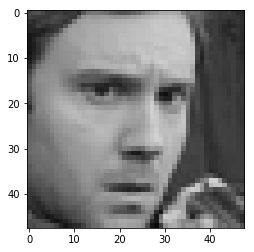

In [88]:
plt.imshow(data_rgb[0].transpose(0, 2).transpose(0,1).detach().numpy().reshape(48, 48, 3), interpolation='none')

In [92]:
new_arr = []
for i in range(2):
    x2 = model.forward(data_rgb[i].reshape(1, 3, 48, 48))
    x4 = model.forward(x2)
    x8 = model.forward(x4)
    print(x8.transpose(1, 3).detach().numpy().shape)
    new = rescale(image=x8.transpose(1, 3).transpose(1, 2).detach().numpy().reshape(384, 384, 3), scale=224/384, multichannel=True, anti_aliasing=True)
    print(new.shape)
    new = new.reshape(3, 224*224)
    new_arr.append(new)

(1, 384, 384, 3)
(224, 224, 3)
(1, 384, 384, 3)
(224, 224, 3)


In [93]:
new_arr[0].shape

(3, 50176)

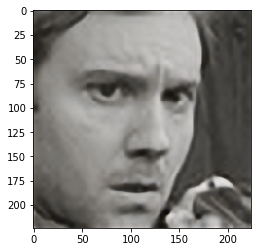

In [94]:
plt.imshow(new_arr[0].reshape(224, 224, 3), interpolation='none')

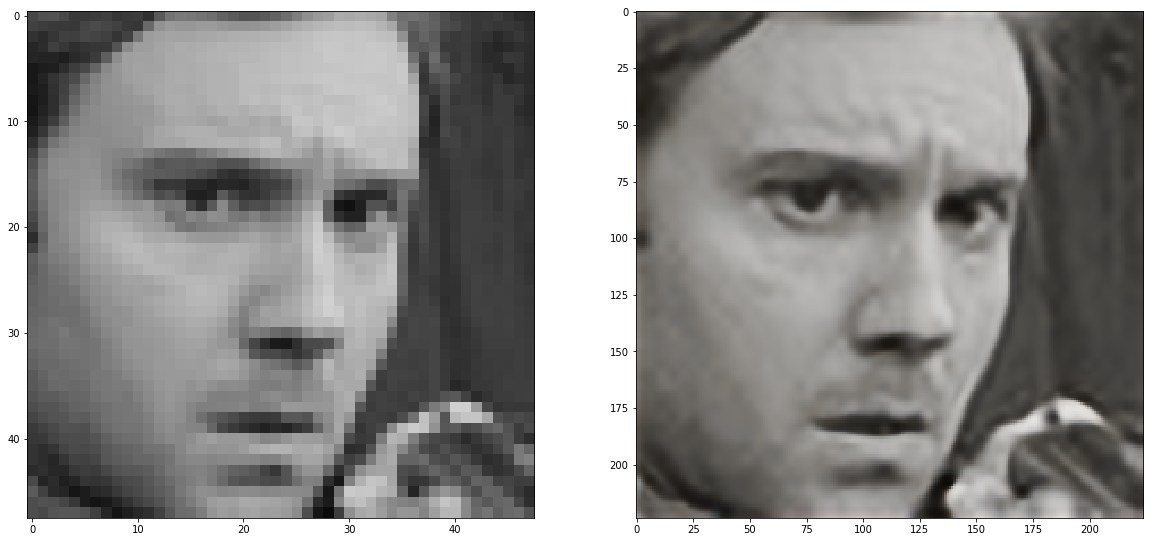

In [100]:
plt.figure(1, figsize=(20, 20))
plt.subplot(1,2,1)
plt.imshow(data_rgb[0].transpose(0, 2).transpose(0,1).detach().numpy().reshape(48, 48, 3), interpolation='none')
plt.subplot(1,2,2)
plt.imshow(new_arr[0].reshape(224, 224, 3), interpolation='none')